# API Data Wrangling with Open-Meteo

In this exercise, we will:

- Fetch historical weather data using the **Open-Meteo API**.
- Parse and clean the data using **pandas**.
- Perform exploratory data analysis.
- Visualize weather trends.

In [3]:
# Install required packages if not already installed
# !pip install requests pandas matplotlib --quiet

In [5]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

## Understand the Open-Meteo API

- **API Endpoint**: `https://archive-api.open-meteo.com/v1/archive`
- **Parameters**:
  - `latitude`: Latitude of the location.
  - `longitude`: Longitude of the location.
  - `start_date`: Start date of the data (YYYY-MM-DD).
  - `end_date`: End date of the data (YYYY-MM-DD).
  - `hourly`: Comma-separated list of variables (e.g., temperature, precipitation).
  - `timezone`: Timezone of the data.

**Documentation**: [Open-Meteo API Docs](https://open-meteo.com/en/docs)

In [7]:
# Step 1: Set Up Parameters

# Location coordinates for New York City
latitude = 40.7128
longitude = -74.0060

# Date range
start_date = '2023-01-01'
end_date = '2023-01-07'  # One week of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']


In [9]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/New_York'
}

response = requests.get(base_url, params=params)


In [11]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [13]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()


,time,temperature_2m,relativehumidity_2m,precipitation
0,2023-01-01T00:00,10.7,99,1.0
1,2023-01-01T01:00,10.5,99,1.0
2,2023-01-01T02:00,10.4,98,0.1
3,2023-01-01T03:00,10.3,96,0.0
4,2023-01-01T04:00,9.7,95,0.0


In [15]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()


temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [19]:
# Handle missing values (if any)
# df.fillna(method='ffill', inplace=True)  # Forward fill
df.ffill(inplace=True)

In [21]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,168.000000,168.000000,168.000000
mean,8.371429,86.422619,0.142857
std,3.495063,12.799933,0.436037
min,0.400000,45.000000,0.000000
25%,5.900000,81.000000,0.000000
50%,8.250000,90.500000,0.000000
75%,11.100000,97.000000,0.000000
max,17.900000,100.000000,3.100000


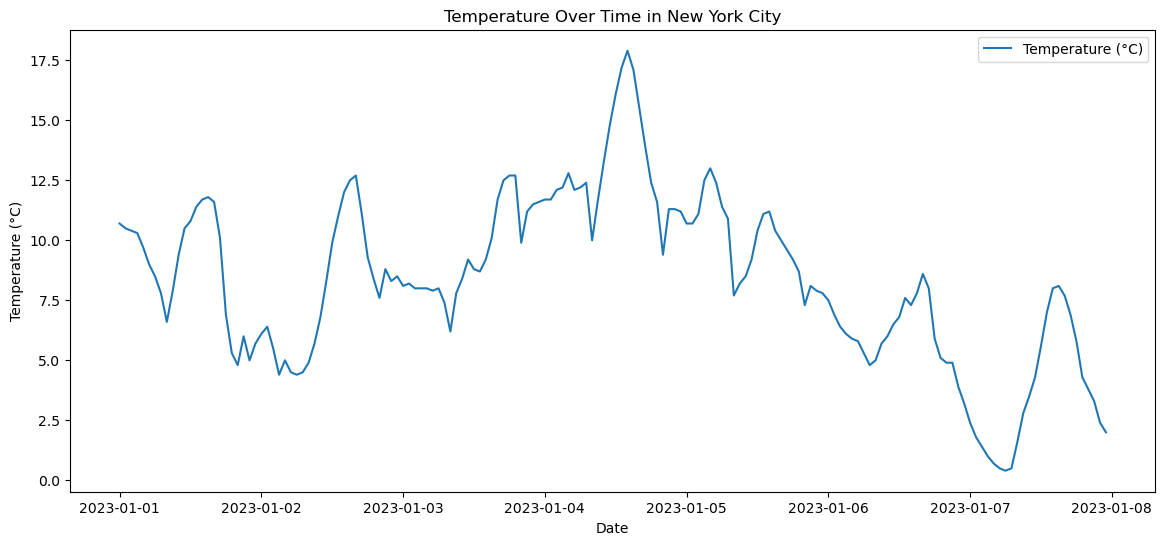

In [23]:
# Plot Temperature Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature_2m'], label='Temperature (°C)')
plt.title('Temperature Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

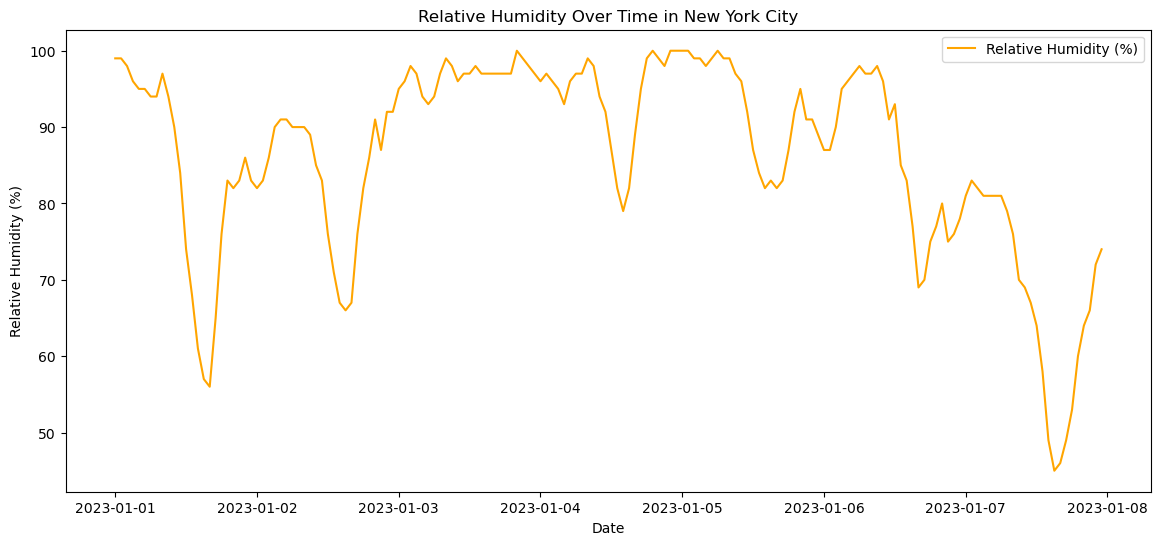

In [25]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['relativehumidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()


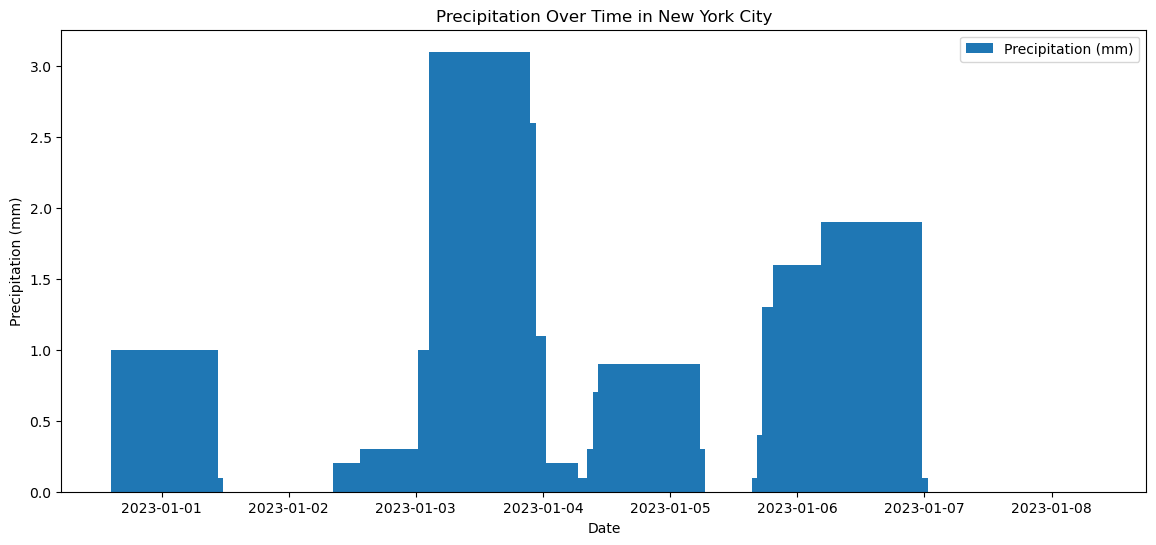

In [27]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df.index, df['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [29]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation = df['temperature_2m'].corr(df['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity: {correlation:.2f}')


Correlation between Temperature and Relative Humidity: 0.24


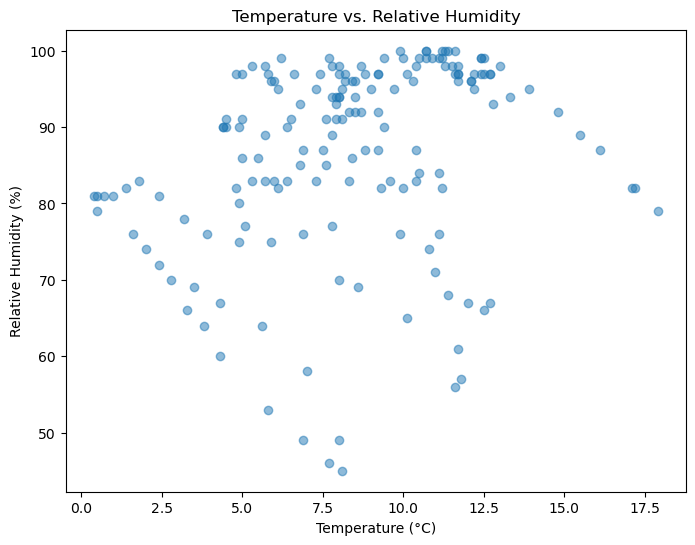

In [31]:
# Scatter Plot of Temperature vs. Relative Humidity

plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_2m'], df['relativehumidity_2m'], alpha=0.5)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


In [35]:
# Step 7: Resample Data to Daily Averages

daily_avg = df.resample('D').mean()
daily_avg


,temperature_2m,relativehumidity_2m,precipitation
time,,,
2023-01-01,8.850000,83.708333,0.087500
2023-01-02,7.775000,83.458333,0.020833
2023-01-03,9.408333,96.875000,0.395833
2023-01-04,12.995833,94.166667,0.095833
2023-01-05,9.916667,92.666667,0.000000
2023-01-06,6.079167,86.125000,0.400000
2023-01-07,3.575000,67.958333,0.000000


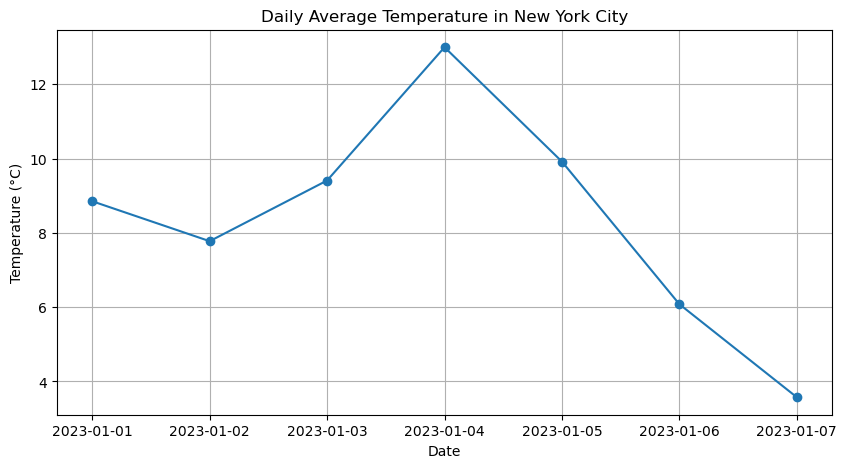

In [37]:
# Plot Daily Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg['temperature_2m'], marker='o')
plt.title('Daily Average Temperature in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [41]:
# Step 8: Compare with Another Location (Los Angeles)

# Coordinates for Los Angeles
latitude_la = 34.0522
longitude_la = -118.2437

params_la = {
    'latitude': latitude_la,
    'longitude': longitude_la,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_la = requests.get(base_url, params=params_la)

# Load and clean Los Angeles data
data_la = response_la.json()
hourly_data_la = data_la['hourly']
df_la = pd.DataFrame(hourly_data_la)

df_la['time'] = pd.to_datetime(df_la['time'])
df_la.set_index('time', inplace=True)
# df_la.fillna(method='ffill', inplace=True)
df_la.ffill(inplace=True)

In [43]:
# Resample Los Angeles Data to Daily Averages

daily_avg_la = df_la.resample('D').mean()


In [45]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'New York': daily_avg['temperature_2m'],
    'Los Angeles': daily_avg_la['temperature_2m']
})


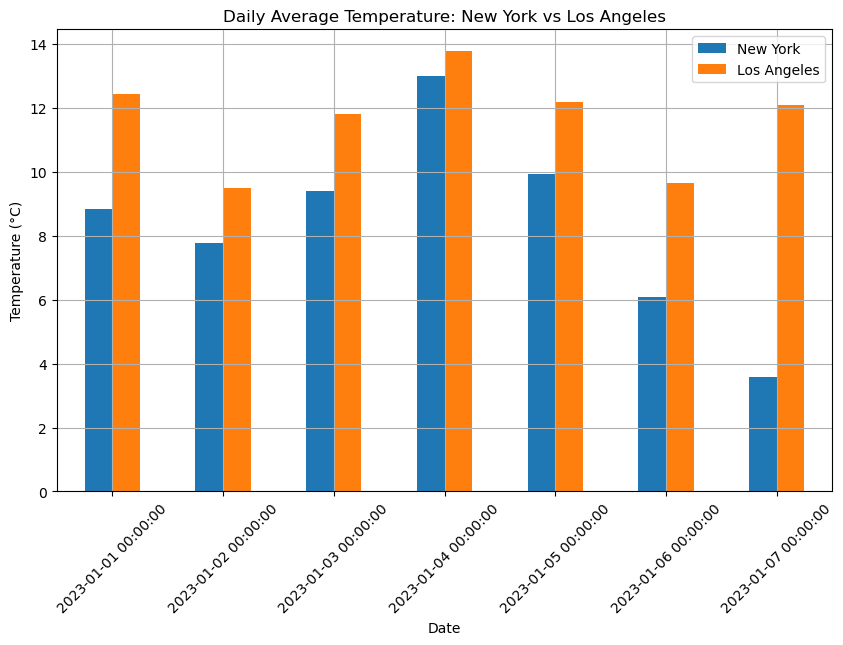

In [47]:
# Plot Comparison of Daily Average Temperature

combined_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Daily Average Temperature: New York vs Los Angeles')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [49]:
# Step 9: Advanced Analysis - Temperature Difference

# Calculate Temperature Difference
combined_temp['Temp Difference'] = combined_temp['Los Angeles'] - combined_temp['New York']
combined_temp


,New York,Los Angeles,Temp Difference
time,,,
2023-01-01,8.850000,12.433333,3.583333
2023-01-02,7.775000,9.483333,1.708333
2023-01-03,9.408333,11.808333,2.400000
2023-01-04,12.995833,13.766667,0.770833
2023-01-05,9.916667,12.183333,2.266667
2023-01-06,6.079167,9.662500,3.583333
2023-01-07,3.575000,12.095833,8.520833


In [51]:
# Step 10: Save Data to CSV (Optional)

# Save New York data
df.to_csv('new_york_weather.csv')

# Save Los Angeles data
df_la.to_csv('los_angeles_weather.csv')


## Conclusion

In this exercise, we:

- Accessed and retrieved data from the **Open-Meteo API**.
- Cleaned and preprocessed JSON data using **pandas**.
- Performed exploratory data analysis and visualization.
- Compared weather patterns between **New York City** and **Los Angeles**.

---

**Next Steps**:

- **Extend the Date Range**: Analyze seasonal trends by fetching data over several months.
- **Fetch Additional Variables**: Include wind speed, atmospheric pressure, or other interesting variables.
- **Forecasting**: Use statistical methods or machine learning models to forecast future weather patterns.
- **Global Analysis**: Compare data from other global cities to gain broader insights.


## Exercises for Students

Now it's your turn! Below are some exercises to reinforce what you've learned. Try to complete them without looking at the solutions.

### Exercise: Compare Rainfall Between London and Seattle

- **Objective**: Compare the total weekly rainfall between London and Seattle over a full year.
- **Tasks**:
  1. **Fetch Data**: Retrieve hourly precipitation data for London and Seattle for the year 2022.
     - **London Coordinates**: Latitude `51.5074`, Longitude `-0.1278`
     - **Seattle Coordinates**: Latitude `47.6062`, Longitude `-122.3321`
  2. **Data Cleaning**: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
  3. **Resample Data**: Resample the hourly data to weekly totals.
  4. **Visualization**: Plot the weekly total precipitation for both cities on the same graph.
  5. **Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.

**Note**: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.

### Tips:

- **API Parameters**: Make sure to adjust the parameters like `latitude`, `longitude`, `start_date`, `end_date`, `hourly`, and `timezone` as needed.
- **Error Handling**: Always check if your API requests are successful before proceeding.
- **Data Storage**: Consider saving your DataFrames to CSV files for future analysis.
- **Visualization**: Customize your plots with titles, labels, legends, and gridlines for better readability.

Happy coding!


### Objective: Compare the total weekly rainfall between London and Seattle over a full year.

In [83]:
# Task 1) Fetch Data: Retrieve hourly precipitation data for London and Seattle for the year 2022

# Set Up Parameters
# Location coordinates for London
latitude_L = 51.5074
longitude_L = -0.1278

# Location coordinates for Seattle
latitude_S = 47.6062
longitude_S = -122.3321

# Date range
start_date = '2022-01-01'
end_date = '2022-12-31'  # One year of data

# Variables to fetch
hourly_variables = ["temperature_2m", "precipitation", "rain", "relative_humidity_2m"]


# Make the API Request
base_url = 'https://archive-api.open-meteo.com/v1/archive'

params_L = {
    'latitude': latitude_L,
    'longitude': longitude_L,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'Europe/London'
}

params_S = {
    'latitude': latitude_S,
    'longitude': longitude_S,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    "timezone": "America/Los_Angeles"
}

response_L = requests.get(base_url, params=params_L)
response_S = requests.get(base_url, params=params_S)


In [85]:
# Check if the request was successful
if response_L.status_code == 200:
    print('London Data fetched successfully!')
else:
    print(f'Failed to fetch London data. Status code: {response.status_code}')

if response_S.status_code == 200:
    print('Seattle Data fetched successfully!')
else:
    print(f'Failed to fetch Seattle data. Status code: {response.status_code}')

London Data fetched successfully!
Seattle Data fetched successfully!


In [87]:
# Load Data into pandas DataFrame
data_L = response_L.json()
data_S = response_S.json()
hourly_data_L = data_L['hourly']
hourly_data_S = data_S['hourly']
london = pd.DataFrame(hourly_data_L)
seattle = pd.DataFrame(hourly_data_S)

print(london.head())
print(seattle.head())

               time  temperature_2m  precipitation  rain  relative_humidity_2m
0  2022-01-01T00:00            12.7            0.0   0.0                    91
1  2022-01-01T01:00            12.7            0.0   0.0                    93
2  2022-01-01T02:00            12.8            0.0   0.0                    93
3  2022-01-01T03:00            12.5            0.0   0.0                    93
4  2022-01-01T04:00            12.3            0.0   0.0                    92
               time  temperature_2m  precipitation  rain  relative_humidity_2m
0  2022-01-01T00:00            -6.3            0.0   0.0                    77
1  2022-01-01T01:00            -6.4            0.0   0.0                    76
2  2022-01-01T02:00            -8.3            0.0   0.0                    82
3  2022-01-01T03:00            -8.1            0.0   0.0                    82
4  2022-01-01T04:00            -7.9            0.0   0.0                    81


In [89]:
# Task 2) Data Cleaning: Convert the time columns to datetime objects and set them as the index. Handle any missing values.

# Convert 'time' column to datetime
london['time'] = pd.to_datetime(london['time'])
seattle['time'] = pd.to_datetime(seattle['time'])

# Set 'time' as the index
london.set_index('time', inplace=True)
seattle.set_index('time', inplace=True)

# Check for missing values
print(london.isnull().sum())
print(seattle.isnull().sum())

temperature_2m          0
precipitation           0
rain                    0
relative_humidity_2m    0
dtype: int64
temperature_2m          0
precipitation           0
rain                    0
relative_humidity_2m    0
dtype: int64


In [91]:
# Handle missing values (if any)
# df.fillna(method='ffill', inplace=True)  # Forward fill
df.ffill(inplace=True)

In [143]:
# Task 3) Resample Data: Resample the hourly data to WEEKLY totals.

weekly_sum_L = london.resample('W').sum()
weekly_sum_S = seattle.resample('W').sum()
weekly_sum_L.head()

,temperature_2m,precipitation,rain,relative_humidity_2m
time,,,,
2022-01-02,579.7,2.2,2.2,4156
2022-01-09,721.3,12.9,12.9,14448
2022-01-16,590.2,3.1,3.1,15918
2022-01-23,438.7,0.0,0.0,15020
2022-01-30,808.7,0.1,0.1,14538


In [145]:
# Task 4) Visualization: Plot the weekly total precipitation for both cities on the same graph.
# Combine dataframes
combined_temp = pd.DataFrame({
    'London': weekly_sum_L['temperature_2m'],
    'Seattle': weekly_sum_S['temperature_2m']
})
combined_precip = pd.DataFrame({
    'London': weekly_sum_L['precipitation'],
    'Seattle': weekly_sum_S['precipitation']
})

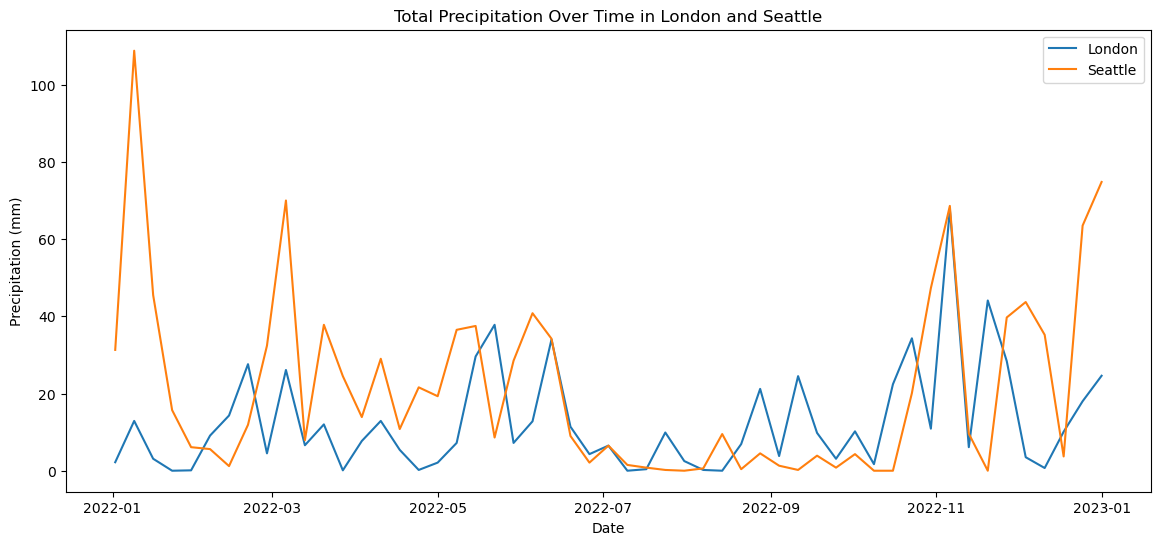

In [155]:
# Plot Precipitation Over Time
plt.figure(figsize=(14, 6))
plt.plot(weekly_sum_L.index, weekly_sum_L['precipitation'], label='London')
plt.plot(weekly_sum_S.index, weekly_sum_S['precipitation'], label='Seattle')
plt.title('Total Precipitation Over Time in London and Seattle')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()

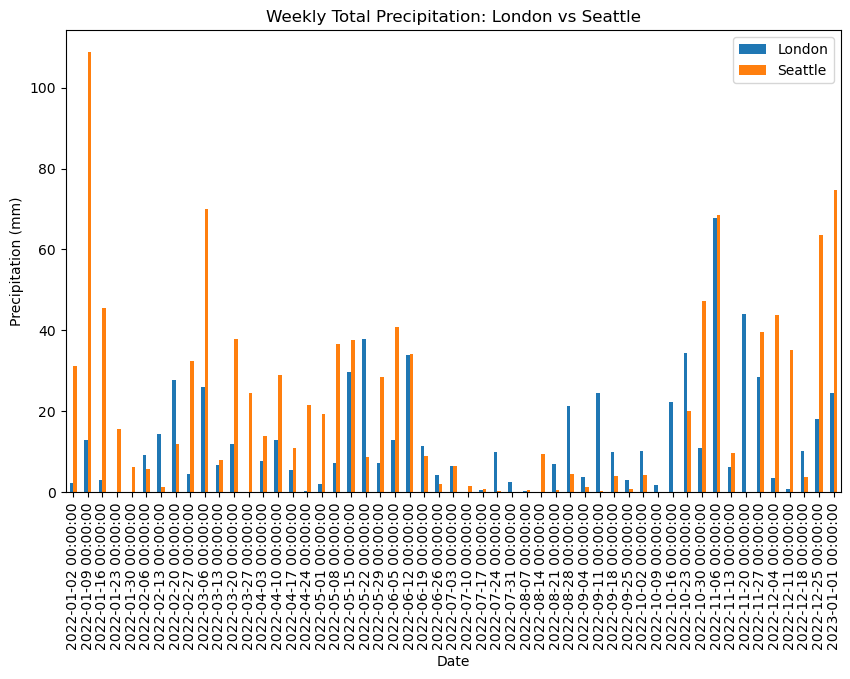

In [157]:
# Plot Comparison of Weekly Average Precipitation

combined_precip.plot(kind='bar', figsize=(10, 6))
plt.title('Weekly Total Precipitation: London vs Seattle')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=90)
# plt.grid(True)
plt.show()


In [159]:
# Task 5) Analysis: Determine which city had more rainfall overall and identify any interesting patterns.

Seattle had more rainful than London in all months except for July, August, and September.

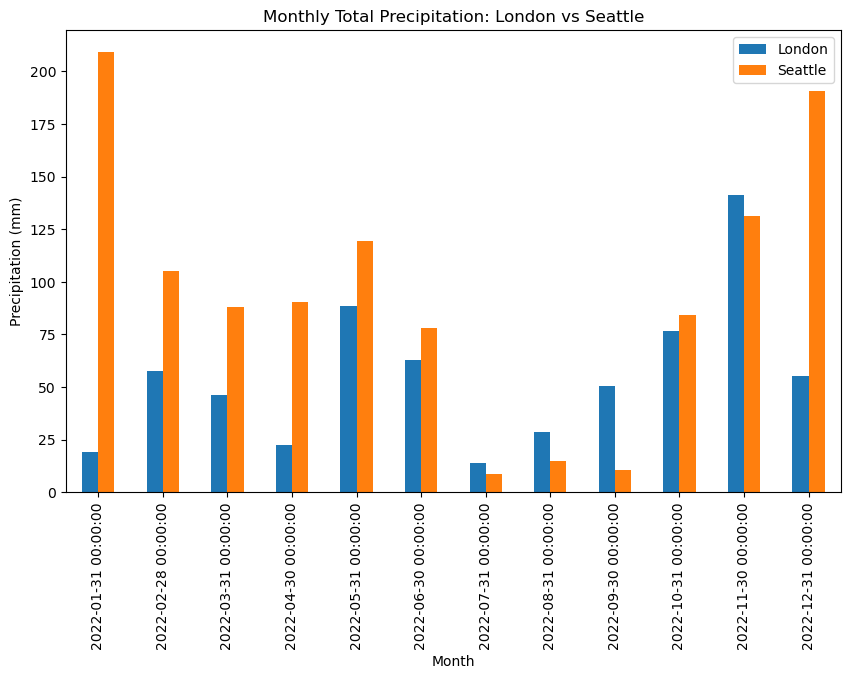

In [172]:
# Look at monthly

monthly_sum_L = london.resample('ME').sum()
monthly_sum_S = seattle.resample('ME').sum()

combined_precip_monthly = pd.DataFrame({
    'London': monthly_sum_L['precipitation'],
    'Seattle': monthly_sum_S['precipitation']
})

combined_precip_monthly.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Total Precipitation: London vs Seattle')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=90)
plt.show()

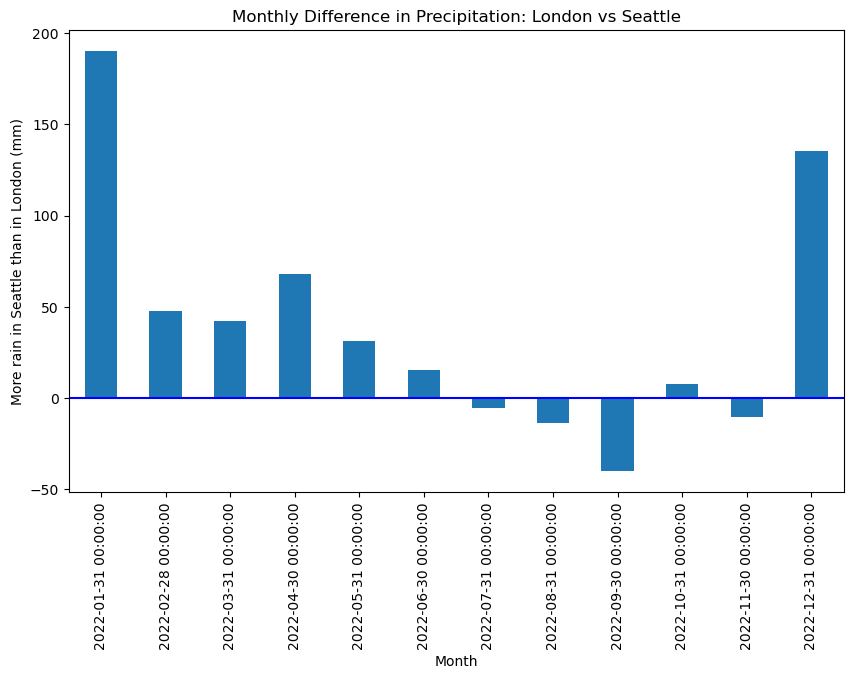

In [182]:
combined_precip_monthly['difference'] = combined_precip_monthly['Seattle'] - combined_precip_monthly['London']
combined_precip_monthly['difference'].plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Difference in Precipitation: London vs Seattle')
plt.xlabel('Month')
plt.ylabel('More rain in Seattle than in London (mm)')
plt.axhline(y=0, color='b', linestyle='-')
plt.xticks(rotation=90)
plt.show()

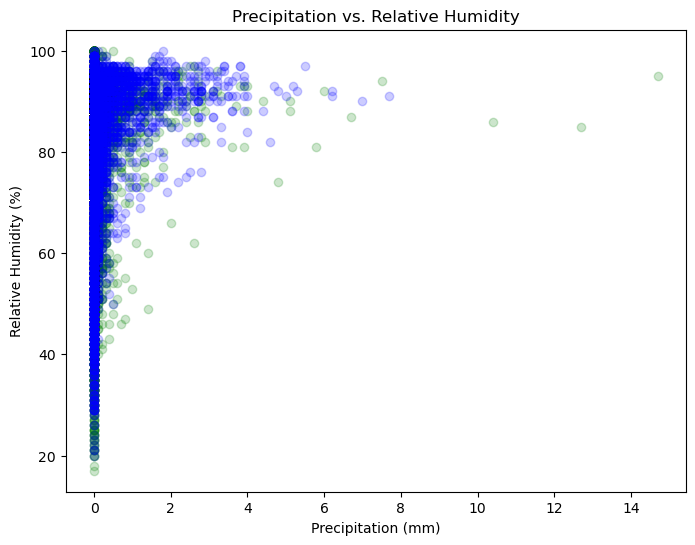

In [195]:
# Scatter Plot of Precipitation vs. Relative Humidity

plt.figure(figsize=(8, 6))
plt.scatter(london['precipitation'], london['relative_humidity_2m'], color='g', alpha=0.2)
plt.scatter(seattle['precipitation'], seattle['relative_humidity_2m'], color='b', alpha=0.2)
plt.title('Precipitation vs. Relative Humidity')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Relative Humidity (%)')
plt.show()

# There are very humid days, but doesn't necessarily mean it will rain.
# But when there is a lot of precipitation, there definitely is a lot of humidity.

In [187]:
# Calculate correlation between precipitation and humidity
correlation_L = london['precipitation'].corr(london['relative_humidity_2m'])
correlation_S = seattle['precipitation'].corr(seattle['relative_humidity_2m'])
print(f'Correlation between Precipitation and Relative Humidity in London: {correlation_L:.2f}')
print(f'Correlation between Precipitation and Relative Humidity in Seattle: {correlation_S:.2f}')

# Seattle is more prone to precipitating when there is humidity.
# London might not rain, even though it is very humid.

Correlation between Precipitation and Relative Humidity in London: 0.10
Correlation between Precipitation and Relative Humidity in Seattle: 0.23
